ML4VA

Helen Yao, Eva Butler, and Larissa Cybyk

In [1]:
import pandas as pd
import numpy as np

/var/folders/mq/q8yqw19527jcsw2d54wc3b2w0000gn/T/ipykernel_40381/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data Cleaning & Visualization

loading/condensing crash data:

In [2]:
import datetime
try:
    crash_data = pd.read_csv('./crash_data.csv', sep='\t')
except:

    crash_data = pd.read_csv('./CrashData_test.csv')
    # crash_data.head()

    # crash_data.isnull().sum()

    crash_data = crash_data[['RTE Name','Crash Date']]

    # print(crash_data)

    crash_data['Crash Date'] = pd.to_datetime(crash_data['Crash Date'].str.split(' ', expand=True)[0], format='%m/%d/%Y')


    duplicate = crash_data.pivot_table(index = ['RTE Name', 'Crash Date'], aggfunc ='size')

    crash_data['Total Crashes'] = crash_data.set_index(['RTE Name', 'Crash Date']).index.map(duplicate)

    crash_data = crash_data.drop_duplicates()
    print(crash_data)

    # f = open("crash_data.csv", "a")
    crash_data.to_csv("crash_data.csv", sep='\t', encoding='utf-8')
    # f.close()

In [3]:
crash_data.head()

,Unnamed: 0,RTE Name,Crash Date,Total Crashes
0,0,R-VA IS00095NB,2016-12-06,15
1,1,S-VA114NP WOODLAND RD,2016-01-26,1
2,2,R-VA066SC00640NB,2016-02-13,1
3,3,R-VA042SC00782SB,2016-03-26,1
4,4,R-VA US00220NB,2016-07-18,1


loading/cleaning traffic volume data:

In [4]:
# load data

traffic_volume = pd.read_csv('./VDOT_Traffic_Volume.csv')

In [5]:
traffic_volume.head()

traffic_volume.columns
print(traffic_volume.shape)
nulls = traffic_volume.isnull().sum()
print(nulls)

(121679, 42)
OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
PERCENT_4_TIRE                   94712
PERCENT_BUS                      94712
PERCENT_TRUCK_2_AXLE             94712
PERCENT_TRUCK_3_AXLE             94712
PERCENT_TRUCK_1_TRAIL            94712
PERCENT_TRUCK_2_TRAIL            94712
CLASS_QUALITY_CODE                   0
K_FACTOR                         92351
K_FACTOR_QUALITY_CODE               63
DIRECTION_FACTOR                 92371
AAWDT                            91950
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDI

In [6]:
# dropping null columns / columns with a lot of missing data

to_drop = []
for col in traffic_volume.columns:
    if nulls[col] > 90000:
        to_drop.append(col)
print(to_drop)
traffic_volume = traffic_volume.drop(columns=to_drop)

['PERCENT_4_TIRE', 'PERCENT_BUS', 'PERCENT_TRUCK_2_AXLE', 'PERCENT_TRUCK_3_AXLE', 'PERCENT_TRUCK_1_TRAIL', 'PERCENT_TRUCK_2_TRAIL', 'K_FACTOR', 'DIRECTION_FACTOR', 'AAWDT', 'PEAK_SINGLE_UNIT_TRUCK', 'PEAK_COMBINATION_TRUCK', 'DATA_CUSTODIAN_EMAIL', 'METADATA_URL']


In [7]:
traffic_volume.isnull().sum()

OBJECTID                          0
LINKID                            0
DATA_DATE                         0
ROUTE_COMMON_NAME                 0
ROUTE_NAME                        0
HTRIS_ID                        745
ROUTE_ALIAS                       0
START_LABEL                       0
END_LABEL                         0
ADT                               3
ADT_QUALITY                       0
CLASS_QUALITY_CODE                0
K_FACTOR_QUALITY_CODE            63
AAWDT_QUALITY_CODE                6
LOC_COMP_DIRECTIONALITY_NAME    196
ROUTE_FROM_MEASURE                0
FROM_JURISDICTION                19
ROUTE_TO_MEASURE                  0
TO_JURISDICTION                  13
EVENT_SOURCE_ID                   0
EVENT_LOCATION_ID                 0
EVENT_COMPONENT_ID                0
MAXIMUMSCALEDENOMINATOR           9
ROUTE_COMMON_NAME_ADT             0
FROM_DISTRICT                   431
TO_DISTRICT                     544
RTE_TYPE_CD                       0
RTE_ID                      

In [8]:
# adding day of week feature
import re
import calendar

def convert_date(date, delim='/'):
    stripped = date.split(delim)
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date
        
    
def day_of_week(given_date):
    day_num = given_date.weekday()
    day = 'sunday'
    if day_num == 0:
        day = 'monday'
    elif day_num == 1:
        day = 'tuesday'
    elif day_num == 2:
        day = 'wednesday'
    elif day_num == 3:
        day = 'thursday'
    elif day_num == 4:
        day = 'friday'
    elif day_num == 5:
        day = 'saturday'
    
    return day

def get_day(given_date):
    return given_date.day

def get_month(given_date):
    return given_date.month

def get_year(given_date):
    return given_date.year

** going to drop data_date once datasets are merged

In [9]:
traffic_volume['DATA_DATE'] = traffic_volume['DATA_DATE'].apply(convert_date) #converting data date into datetime

In [10]:
traffic_volume['DAY_WEEK'] = traffic_volume['DATA_DATE'].apply(day_of_week)
traffic_volume['DAY'] = traffic_volume['DATA_DATE'].apply(get_day)
traffic_volume['MONTH'] = traffic_volume['DATA_DATE'].apply(get_month)
traffic_volume['YEAR'] = traffic_volume['DATA_DATE'].apply(get_year)

In [11]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   OBJECTID                      121679 non-null  int64         
 1   LINKID                        121679 non-null  int64         
 2   DATA_DATE                     121679 non-null  datetime64[ns]
 3   ROUTE_COMMON_NAME             121679 non-null  object        
 4   ROUTE_NAME                    121679 non-null  object        
 5   HTRIS_ID                      120934 non-null  object        
 6   ROUTE_ALIAS                   121679 non-null  object        
 7   START_LABEL                   121679 non-null  object        
 8   END_LABEL                     121679 non-null  object        
 9   ADT                           121676 non-null  float64       
 10  ADT_QUALITY                   121679 non-null  object        
 11  CLASS_QUALITY

merge datasets BEFORE dropping

In [12]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778666 entries, 0 to 778665
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     778666 non-null  int64 
 1   RTE Name       778666 non-null  object
 2   Crash Date     778666 non-null  object
 3   Total Crashes  778666 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 23.8+ MB


In [13]:
type(crash_data['Crash Date'].unique()[0])

str

In [14]:
def convert_crash_date(date):
    if type(date) == pd._libs.tslibs.timestamps.Timestamp:
        return date
    stripped = date.split('-')
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date

In [15]:
crash_data['Crash Date'] = crash_data['Crash Date'].apply(convert_crash_date)

In [16]:
crash_data.head()

,Unnamed: 0,RTE Name,Crash Date,Total Crashes
0,0,R-VA IS00095NB,2016-12-06,15
1,1,S-VA114NP WOODLAND RD,2016-01-26,1
2,2,R-VA066SC00640NB,2016-02-13,1
3,3,R-VA042SC00782SB,2016-03-26,1
4,4,R-VA US00220NB,2016-07-18,1


In [17]:
# merging
new_df = pd.merge(
    left=traffic_volume, 
    right=crash_data,
    how='left',
    left_on=['DATA_DATE', 'ROUTE_NAME'],
    right_on=['Crash Date', 'RTE Name']
)

In [18]:
len(traffic_volume['DATA_DATE'].unique()) #2902 dates in traffic volume data

2902

In [19]:
len(crash_data['Crash Date'].unique()) #3166 dates in traffic volume data

3166

In [20]:
len(set(traffic_volume['DATA_DATE']).intersection(crash_data['Crash Date'])) # only 1266 dates that overlap

1266

In [21]:
len(traffic_volume['ROUTE_NAME'].unique())

64941

In [22]:
len(crash_data['RTE Name'].unique())

59716

In [23]:
len(set(traffic_volume['ROUTE_NAME']).intersection(crash_data['RTE Name'])) # 18766 routes overlap

18766

In [24]:
new_df.shape

(121679, 37)

In [25]:
new_df.isnull().sum()

OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
CLASS_QUALITY_CODE                   0
K_FACTOR_QUALITY_CODE               63
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDICTION                   19
ROUTE_TO_MEASURE                     0
TO_JURISDICTION                     13
EVENT_SOURCE_ID                      0
EVENT_LOCATION_ID                    0
EVENT_COMPONENT_ID                   0
MAXIMUMSCALEDENOMINATOR              9
ROUTE_COMMON_NAME_ADT                0
FROM_DISTRICT                      431
TO_DISTRICT              

dropping route identifiers, addresses, etc and double columns from merge

In [26]:
to_drop = ['ROUTE_COMMON_NAME', 'ROUTE_NAME', 'ROUTE_ALIAS', 'END_LABEL', 'START_LABEL', 'ADT_QUALITY', 'CLASS_QUALITY_CODE', 'K_FACTOR_QUALITY_CODE', 'AAWDT_QUALITY_CODE', 'MAXIMUMSCALEDENOMINATOR', 'ROUTE_COMMON_NAME_ADT','HTRIS_ID', 'Crash Date', 'RTE Name', 'Unnamed: 0', 'DATA_DATE', 'LINKID', 'OBJECTID']

In [27]:
combined_df = new_df.drop(columns=to_drop)

In [28]:
combined_df.head()

,ADT,LOC_COMP_DIRECTIONALITY_NAME,ROUTE_FROM_MEASURE,FROM_JURISDICTION,ROUTE_TO_MEASURE,TO_JURISDICTION,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,FROM_DISTRICT,TO_DISTRICT,RTE_TYPE_CD,RTE_ID,Shape__Length,DAY_WEEK,DAY,MONTH,YEAR,Total Crashes
0,490.0,Bidirectional,0.000,Frederick County,0.24,Frederick County,795997,1,1,Staunton,Staunton,SC,2532756,478.381712,tuesday,7,6,2011,NaN
1,10.0,Bidirectional,0.620,Campbell County,0.64,Campbell County,709217,1,1,Lynchburg,Lynchburg,SC,1733670,47.494224,tuesday,10,12,2019,NaN
2,150.0,Bidirectional,3.180,Dickenson County,7.55,Dickenson County,720637,1,1,Bristol,Bristol,SC,1857885,8693.982351,monday,29,11,2021,NaN
3,47.0,Bidirectional,2.000,Nelson County,5.40,Nelson County,755648,1,1,Lynchburg,Lynchburg,SC,2111709,6516.476138,thursday,30,7,2020,NaN
4,30.0,Bidirectional,2.031,Washington County,2.08,Washington County,776797,1,1,Bristol,Bristol,SC,1594318,100.504177,friday,7,7,2017,NaN


In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ADT                           121676 non-null  float64
 1   LOC_COMP_DIRECTIONALITY_NAME  121483 non-null  object 
 2   ROUTE_FROM_MEASURE            121679 non-null  float64
 3   FROM_JURISDICTION             121660 non-null  object 
 4   ROUTE_TO_MEASURE              121679 non-null  float64
 5   TO_JURISDICTION               121666 non-null  object 
 6   EVENT_SOURCE_ID               121679 non-null  int64  
 7   EVENT_LOCATION_ID             121679 non-null  int64  
 8   EVENT_COMPONENT_ID            121679 non-null  int64  
 9   FROM_DISTRICT                 121248 non-null  object 
 10  TO_DISTRICT                   121135 non-null  object 
 11  RTE_TYPE_CD                   121679 non-null  object 
 12  RTE_ID                        121679 non-nul

In [30]:
for feature in combined_df.select_dtypes("object"):
    print(feature, len(combined_df[feature].unique()))

LOC_COMP_DIRECTIONALITY_NAME 4
FROM_JURISDICTION 185
TO_JURISDICTION 185
FROM_DISTRICT 10
TO_DISTRICT 10
RTE_TYPE_CD 8
DAY_WEEK 7


Final combined dataframe:

In [31]:
combined_df['Total Crashes'] = combined_df['Total Crashes'].fillna(0)

In [32]:
combined_df.head()

,ADT,LOC_COMP_DIRECTIONALITY_NAME,ROUTE_FROM_MEASURE,FROM_JURISDICTION,ROUTE_TO_MEASURE,TO_JURISDICTION,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,FROM_DISTRICT,TO_DISTRICT,RTE_TYPE_CD,RTE_ID,Shape__Length,DAY_WEEK,DAY,MONTH,YEAR,Total Crashes
0,490.0,Bidirectional,0.000,Frederick County,0.24,Frederick County,795997,1,1,Staunton,Staunton,SC,2532756,478.381712,tuesday,7,6,2011,0.0
1,10.0,Bidirectional,0.620,Campbell County,0.64,Campbell County,709217,1,1,Lynchburg,Lynchburg,SC,1733670,47.494224,tuesday,10,12,2019,0.0
2,150.0,Bidirectional,3.180,Dickenson County,7.55,Dickenson County,720637,1,1,Bristol,Bristol,SC,1857885,8693.982351,monday,29,11,2021,0.0
3,47.0,Bidirectional,2.000,Nelson County,5.40,Nelson County,755648,1,1,Lynchburg,Lynchburg,SC,2111709,6516.476138,thursday,30,7,2020,0.0
4,30.0,Bidirectional,2.031,Washington County,2.08,Washington County,776797,1,1,Bristol,Bristol,SC,1594318,100.504177,friday,7,7,2017,0.0


additional features may be added or dropped after some testing:

visualization:

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

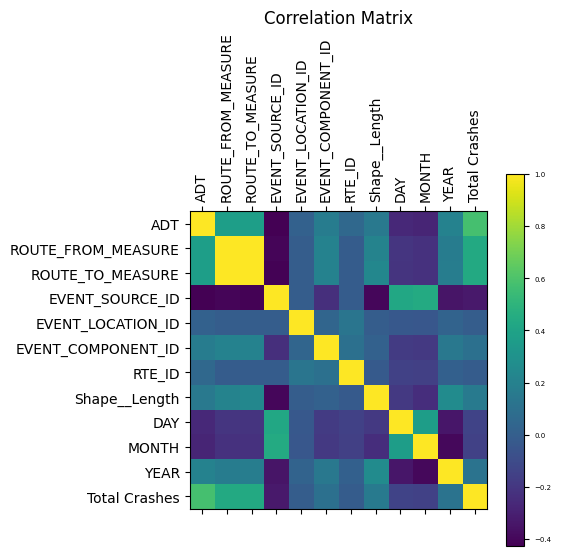

In [34]:
plt.matshow(combined_df.corr(numeric_only=True))

# plt.xticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10, rotation=90)
# plt.yticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10)

plt.xticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()

Transformation and model:

In [35]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



combined_df.dropna(subset=['ADT'], inplace=True)

train_labels = combined_df["ADT"].copy()

traffic_train = combined_df.drop("ADT", axis=1)

num_attr = ["ROUTE_FROM_MEASURE","ROUTE_TO_MEASURE", "DAY", "MONTH", "YEAR", "Total Crashes", "Shape__Length"]
cat_attr = ["LOC_COMP_DIRECTIONALITY_NAME","FROM_JURISDICTION", "TO_JURISDICTION", "FROM_DISTRICT", "TO_DISTRICT","DAY_WEEK"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])



full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])

traffic_prepared = full_pipeline.fit_transform(traffic_train)

print(traffic_prepared)

  (0, 0)	-0.20255302361039793
  (0, 1)	-0.21005289713329153
  (0, 2)	-0.4953238588483055
  (0, 3)	0.19531872306545703
  (0, 4)	-1.240544122410199
  (0, 5)	-0.1296346944355703
  (0, 6)	-0.3377489583636506
  (0, 7)	1.0
  (0, 82)	1.0
  (0, 267)	1.0
  (0, 389)	1.0
  (0, 399)	1.0
  (0, 406)	1.0
  (1, 0)	-0.18564425854642774
  (1, 1)	-0.19920561384024263
  (1, 2)	-0.18609864028238515
  (1, 3)	1.8508236478477738
  (1, 4)	0.3292939779937794
  (1, 5)	-0.1296346944355703
  (1, 6)	-0.5631459869865738
  (1, 7)	1.0
  (1, 26)	1.0
  (1, 211)	1.0
  (1, 385)	1.0
  (1, 395)	1.0
  :	:
  (121674, 1)	-0.2116799896272489
  (121674, 2)	-1.113774295980146
  (121674, 3)	-1.18426871425314
  (121674, 4)	0.9179832656452712
  (121674, 5)	-0.1296346944355703
  (121674, 6)	-0.3866971691269017
  (121674, 9)	1.0
  (121674, 91)	1.0
  (121674, 276)	1.0
  (121674, 387)	1.0
  (121674, 397)	1.0
  (121674, 403)	1.0
  (121675, 0)	-0.20255302361039793
  (121675, 1)	-0.1457827436219767
  (121675, 2)	1.8754028168237504
  (12167

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

traffic_prepared.shape

# train_labels.isnull().sum()

lin_reg.fit(traffic_prepared, train_labels)

some_data = combined_df.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)
print(some_data_prepared)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

  (0, 0)	-0.20255302361039793
  (0, 1)	-0.21005289713329153
  (0, 2)	-0.4953238588483055
  (0, 3)	0.19531872306545703
  (0, 4)	-1.240544122410199
  (0, 5)	-0.1296346944355703
  (0, 6)	-0.3377489583636506
  (0, 7)	1.0
  (0, 82)	1.0
  (0, 267)	1.0
  (0, 389)	1.0
  (0, 399)	1.0
  (0, 406)	1.0
  (1, 0)	-0.18564425854642774
  (1, 1)	-0.19920561384024263
  (1, 2)	-0.18609864028238515
  (1, 3)	1.8508236478477738
  (1, 4)	0.3292939779937794
  (1, 5)	-0.1296346944355703
  (1, 6)	-0.5631459869865738
  (1, 7)	1.0
  (1, 26)	1.0
  (1, 211)	1.0
  (1, 385)	1.0
  (1, 395)	1.0
  :	:
  (3, 1)	-0.0701229426529605
  (3, 2)	1.8754028168237504
  (3, 3)	0.47123621052917647
  (3, 4)	0.5255237405442768
  (3, 5)	-0.1296346944355703
  (3, 6)	2.820775205934
  (3, 7)	1.0
  (3, 110)	1.0
  (3, 295)	1.0
  (3, 385)	1.0
  (3, 395)	1.0
  (3, 405)	1.0
  (4, 0)	-0.14716318192503758
  (4, 1)	-0.16015539398526651
  (4, 2)	-0.4953238588483055
  (4, 3)	0.47123621052917647
  (4, 4)	-0.06316554710721516
  (4, 5)	-0.129634694435

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

traffic_predictions = lin_reg.predict(traffic_prepared)
lin_mse = mean_squared_error(train_labels, traffic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

lin_scores = cross_val_score(lin_reg, traffic_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 4986.25228762  8002.46098535  3611.80513426 11055.87275403
  3393.42011716  9396.55286601 12720.38893091  5865.67953386
  5171.8472804   9750.5450819 ]
Mean: 7395.482497149198
Standard deviation: 3083.7326280215525


In [38]:
combined_df.describe()

,ADT,ROUTE_FROM_MEASURE,ROUTE_TO_MEASURE,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,RTE_ID,Shape__Length,DAY,MONTH,YEAR,Total Crashes
count,121676.000000,121676.000000,121676.000000,121676.000000,121676.000000,121676.000000,1.216760e+05,121537.000000,121676.000000,121676.000000,121676.000000,121676.000000
mean,2925.920798,7.427087,7.985825,680139.468868,1.001307,1.094300,2.278001e+06,1124.894898,11.805467,5.292112,2017.321896,0.104663
std,11005.180857,36.667524,36.875744,177604.916451,0.037466,0.424695,1.966400e+06,1912.619735,9.701707,3.624287,5.096088,0.807374
min,0.000000,0.000000,0.003000,10005.000000,1.000000,1.000000,1.372701e+06,0.163981,1.000000,1.000000,1986.000000,0.000000
25%,90.000000,0.000000,0.140000,707570.750000,1.000000,1.000000,1.638377e+06,168.471838,1.000000,1.000000,2015.000000,0.000000
50%,230.000000,0.000000,0.350000,737897.500000,1.000000,1.000000,1.897503e+06,385.635457,10.000000,5.000000,2018.000000,0.000000
75%,950.000000,0.600000,1.540000,768758.250000,1.000000,1.000000,2.149436e+06,1168.175414,20.000000,8.000000,2022.000000,0.000000
max,245000.000000,508.757000,509.720000,990120.000000,3.000000,11.000000,3.802397e+07,44742.909029,31.000000,12.000000,2022.000000,16.000000


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(traffic_prepared, train_labels)

housing_predictions = tree_reg.predict(traffic_prepared)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

scores = cross_val_score(tree_reg, traffic_prepared, train_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [ 6742.82420918  8165.79701292  5556.10409592 14186.25727285
  7502.65935311]
Mean: 8430.72838879606
Standard deviation: 3005.664613655382


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    { 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
  ]

decision_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(decision_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(traffic_prepared, train_labels)

grid_search.best_params_

grid_search.best_estimator_

final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(traffic_train)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(train_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

80.81562946207004